# Predictive Model for Inventory Management

 **Objective:**
 
The aim of this project is to create a robust predictive model for inventory management that leverages historical 
sales data, inventory records. By analyzing these datasets, the model will forecast product demand, 
allowing for optimized inventory levels to be maintained. 
Additionally, the project involves integrating the predictive model into a Tableau dashboard 
to provide real-time insights and recommendations regarding inventory management strategies.


### DATA:
**Column Descriptions:**
- **Row ID:** A unique identifier assigned to each row in the dataset.
- **Order ID:** An identifier associated with each order placed by customers.
- **Order Date:** The date when a particular order was placed.
- **Ship Date:** The date on which the order was shipped to the customer.
- **Ship Mode:** The shipping mode chosen for delivering the products (e.g., standard, express).
- **Customer ID:** Unique identifier for each customer in the system.
- **Customer Name:** Name of the customer who placed the order.
- **Segment:** The segment to which the customer belongs (e.g., corporate, consumer).
- **City:** The city where the order was placed by the customer.
- **State:** The state corresponding to the order placement location.
- **Country:** The country where the order was processed and delivered.
- **Postal Code:** The postal code associated with the delivery address.
- **Market:** Information regarding the market or sales channel.
- **Region:** Geographic region information related to sales and orders.
- **Product ID:** Unique identifier for each product available in the inventory.
- **Category:** The category to which the product belongs (e.g., office supplies, technology).
- **Sub-Category:** Further classification of products under specific categories.
- **Product Name:** The name or description of the product.
- **Sales:** The total sales amount generated from selling a particular product.
- **Quantity:** The number of units of a product sold or ordered.
- **Discount:** Any discount applied to the product during the transaction.
- **Profit:** The profit obtained from selling a specific product.
- **Shipping Cost:** The cost associated with shipping the product to the customer.
- **Order Priority:** The priority level assigned to the order based on urgency or importance.

In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
walmartdf=pd.read_excel('/Users/apoorvakomatineni/Desktop/Data Analyst /Projects/Project 8/Supermarket_sales.xlsx',sheet_name='Orders')

### Intial Exploration

In [3]:
walmartdf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
walmartdf.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
len(walmartdf)

51290

In [6]:
walmartdf.shape

(51290, 24)

In [7]:
#data types
walmartdf.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [8]:
#dataset information
walmartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [9]:
walmartdf['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [10]:
walmartdf['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [11]:
walmartdf['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [12]:
walmartdf['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [13]:
walmartdf['Product Name'].nunique()

3788

In [14]:
walmartdf['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [15]:
walmartdf['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [16]:
walmartdf.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#checking null values
walmartdf.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [18]:
#getting percentage of missing data within columns
100*walmartdf.isnull().sum()/len(walmartdf)

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

In [19]:
walmartdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570


In [20]:
walmartdf.corr()

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_2715/2624385813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmartdf.corr()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,-0.025449,0.768073,0.272649,-0.079055,0.354441,1.000000


### Data Preprocessing

In [21]:
columns_to_drop = walmartdf[['Row ID','Postal Code']]

In [22]:
# Drop the specified columns from the DataFrame
walmartdf = walmartdf.drop(columns=columns_to_drop,axis=1)

In [23]:
#dropping Duplicates
walmartdf.drop_duplicates(inplace=True)

In [24]:
walmartdf.shape

(51290, 22)

In [25]:
# Select only numerical columns for outlier detection
numerical_columns = walmartdf.select_dtypes(include=['number'])

# Calculating the first and third quartiles
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Defining the threshold for outliers
threshold = 1.5

# Identifying the outliers
outliers = ((numerical_columns < (Q1 - threshold * IQR)) | (numerical_columns > (Q3 + threshold * IQR))).any(axis=1)

# Removing outliers
walmartdf = walmartdf[~outliers]

In [26]:
walmartdf.shape

(36311, 22)

In [27]:
category_sales = walmartdf.pivot_table(index='Category', values=['Sales','Profit'], aggfunc='sum')

In [28]:
category_sales.reset_index(inplace=True)

In [29]:
category_sales

,Category,Profit,Sales
0,Furniture,94863.92310,8.410124e+05
1,Office Supplies,308072.31270,1.744210e+06
2,Technology,117791.25908,9.152627e+05


In [30]:
Subcategory_sales = walmartdf.pivot_table(index='Sub-Category',values=['Sales','Profit'], aggfunc='sum')

In [31]:
Subcategory_sales.reset_index(inplace=True)

In [32]:
Segment_sales = walmartdf.pivot_table(index='Segment', values=['Sales','Profit'], aggfunc='sum')

In [33]:
Segment_sales.reset_index(inplace=True)

In [34]:
#creating new column called 'Year' which contains the 4 digit year
walmartdf['Year']=walmartdf['Order Date'].dt.strftime('%Y')
walmartdf['Month'] = walmartdf['Order Date'].dt.strftime('%B')

In [35]:
Top10City =walmartdf.nlargest(10,'Sales')[['City','Profit']]
Top10City = pd.DataFrame(data=Top10City )
Top10City 

,City,Profit
8673,Kanpur,46.5000
12659,Mandurah,77.2920
8316,Fairfield,81.1314
8702,San Francisco,81.1314
6309,Los Angeles,28.9650
9429,Mexico City,0.0000
6275,Christchurch,23.0400
7488,Rostock,28.8000
7693,Chincha Alta,-50.1688
10133,Manila,-7.7175


In [36]:
Top10State =walmartdf.nlargest(10,'Sales')[['State','Sales']]
Top10State = pd.DataFrame(data=Top10State)
Top10State

,State,Sales
8673,Uttar Pradesh,581.2500
12659,Western Australia,580.3920
8316,Connecticut,579.5100
8702,California,579.5100
6309,California,579.3000
9429,Distrito Federal,578.2000
6275,Canterbury,577.0800
7488,Mecklenburg-Vorpommern,576.7200
7693,Ica,576.7112
10133,National Capital,576.6525


In [37]:
Top10Country =walmartdf.nlargest(10,'Sales')[['Country','Sales']]
Top10Country = pd.DataFrame(data=Top10Country)
Top10Country 

,Country,Sales
8673,India,581.2500
12659,Australia,580.3920
8316,United States,579.5100
8702,United States,579.5100
6309,United States,579.3000
9429,Mexico,578.2000
6275,New Zealand,577.0800
7488,Germany,576.7200
7693,Peru,576.7112
10133,Philippines,576.6525


### Exploratory Data Analysis

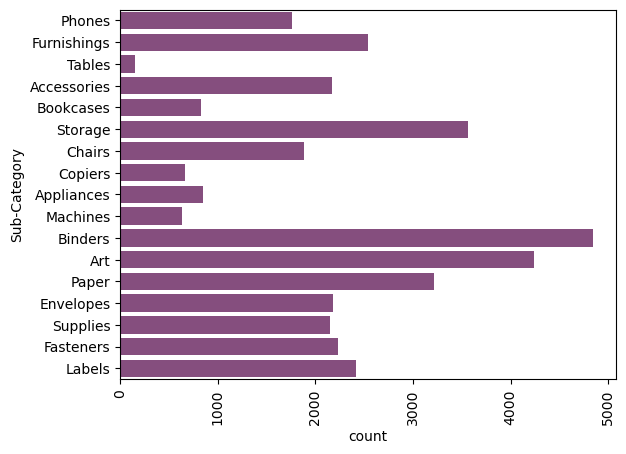

In [38]:
sns.countplot(data=walmartdf,y='Sub-Category',color='#8E4585')
plt.xticks(rotation=90)
plt.show()

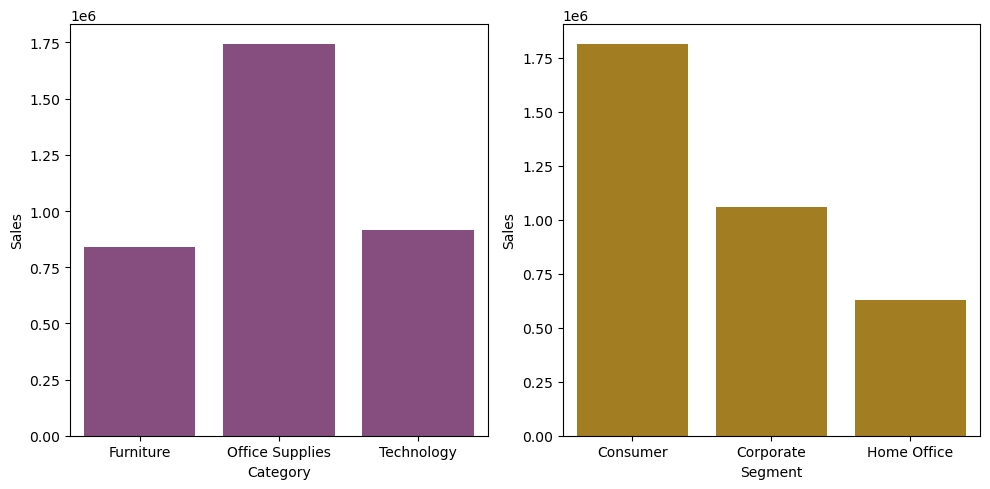

In [39]:
fix, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), tight_layout=True)
sns.barplot(data=category_sales,x='Category',y='Sales',color='#8E4585',ax=ax1) 
sns.barplot(data=Segment_sales,x='Segment',y='Sales',color='#B8860B',ax=ax2)
plt.show()

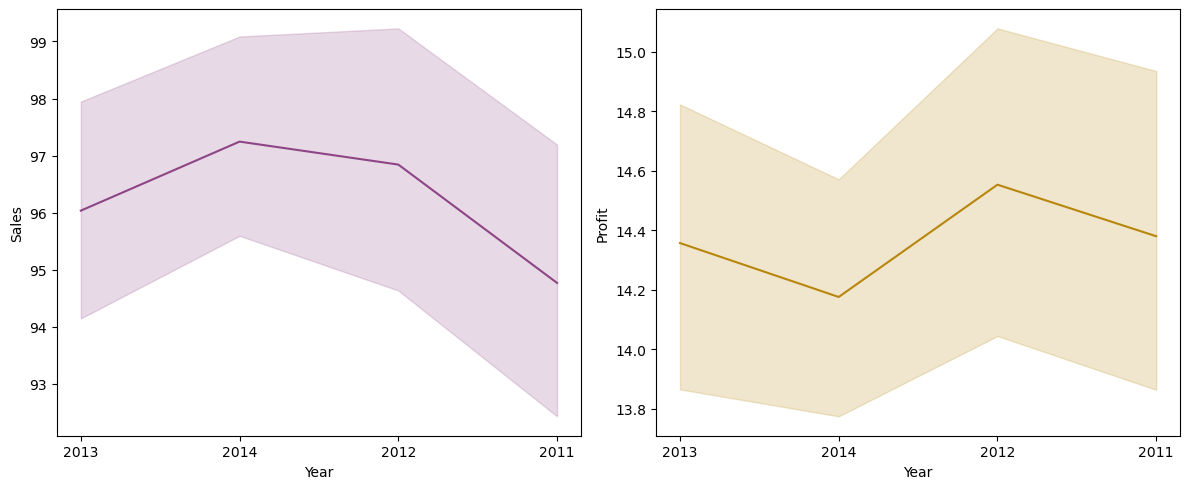

In [40]:
#two sub plots
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),tight_layout=True)

#bar plot
sns.lineplot(data=walmartdf,x='Year',y='Sales',color='#8E4585',ax=ax1) 
sns.lineplot(data=walmartdf,x='Year',y='Profit',color='#B8860B',ax=ax2)
plt.show()

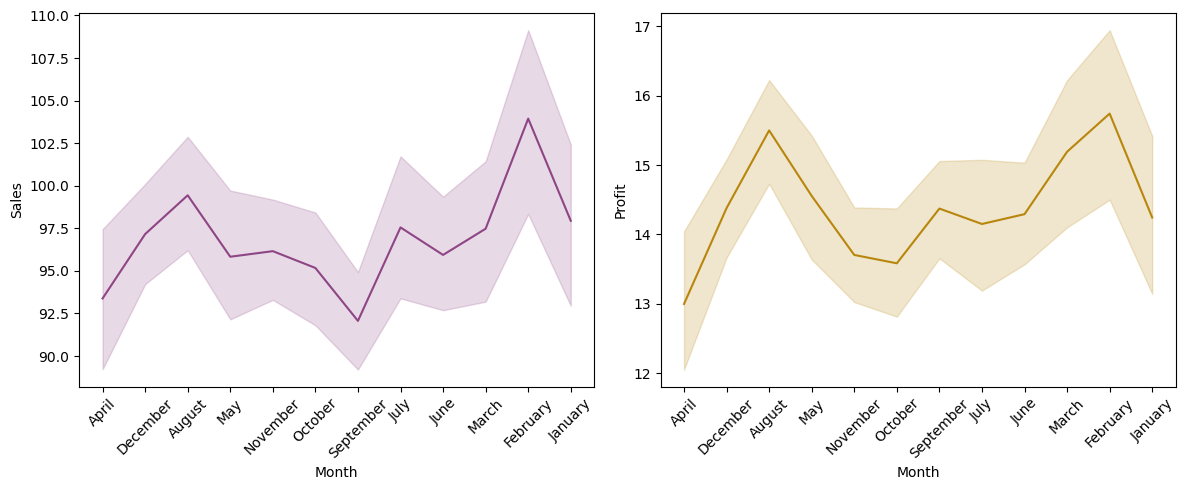

In [41]:
#two sub plots
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),tight_layout=True)

#bar plot
sns.lineplot(data=walmartdf,x='Month',y='Sales',color='#8E4585',ax=ax1) 
sns.lineplot(data=walmartdf,x='Month',y='Profit',color='#B8860B',ax=ax2)
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
plt.show()

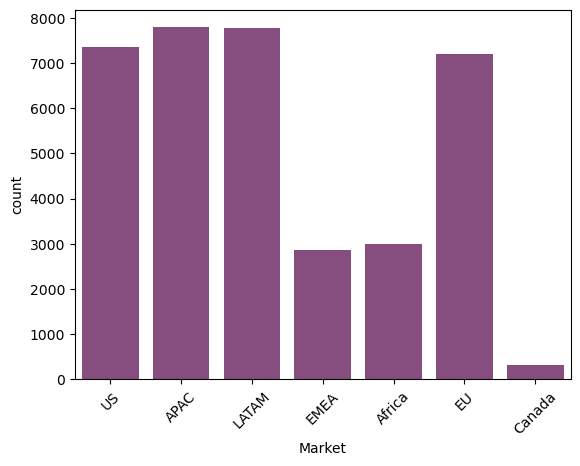

In [42]:
sns.countplot(data=walmartdf,x='Market',color='#8E4585')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

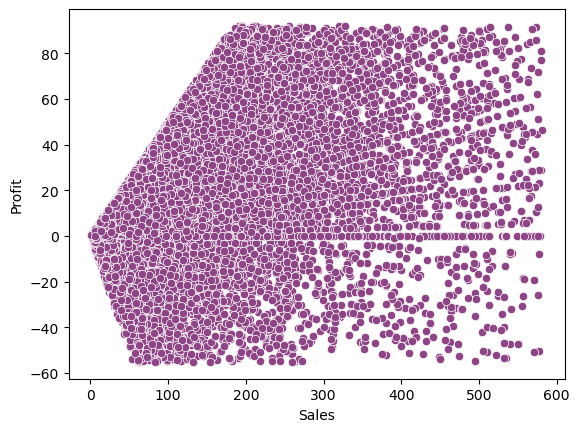

In [43]:
sns.scatterplot(x=walmartdf['Sales'],y=walmartdf['Profit'],color='#8E4585')

<Axes: xlabel='Profit', ylabel='Count'>

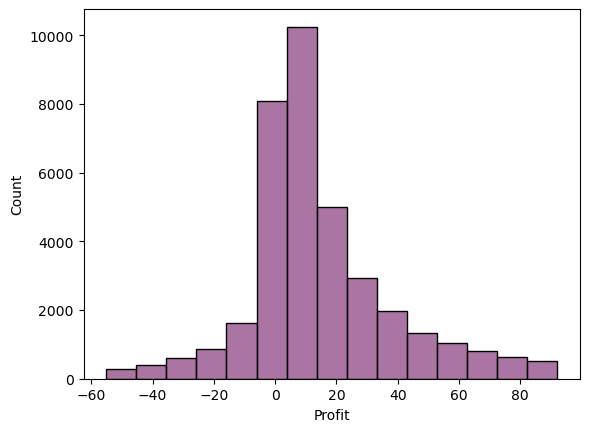

In [44]:
sns.histplot(x=walmartdf['Profit'],bins=15,color='#8E4585')

<Axes: xlabel='Ship Mode', ylabel='Shipping Cost'>

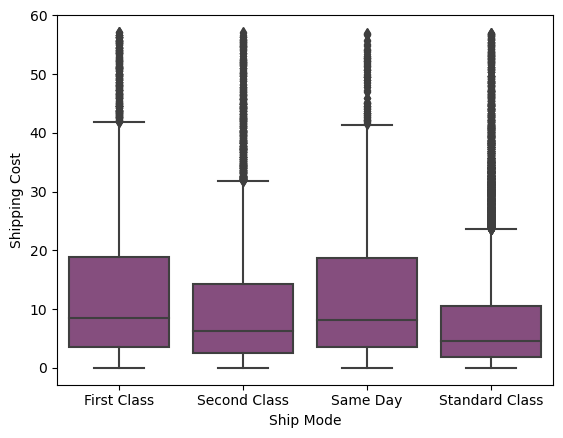

In [45]:
sns.boxplot(y=walmartdf['Shipping Cost'],x=walmartdf['Ship Mode'],dodge=False,color='#8E4585')

<Axes: xlabel='Market', ylabel='Profit'>

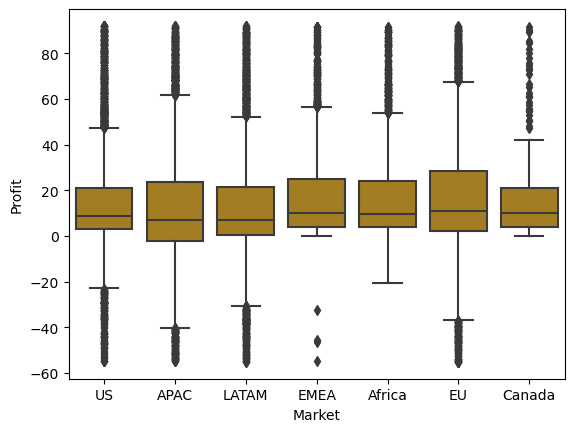

In [46]:
sns.boxplot(y=walmartdf['Profit'],x=walmartdf['Market'],dodge=False,color='#B8860B')

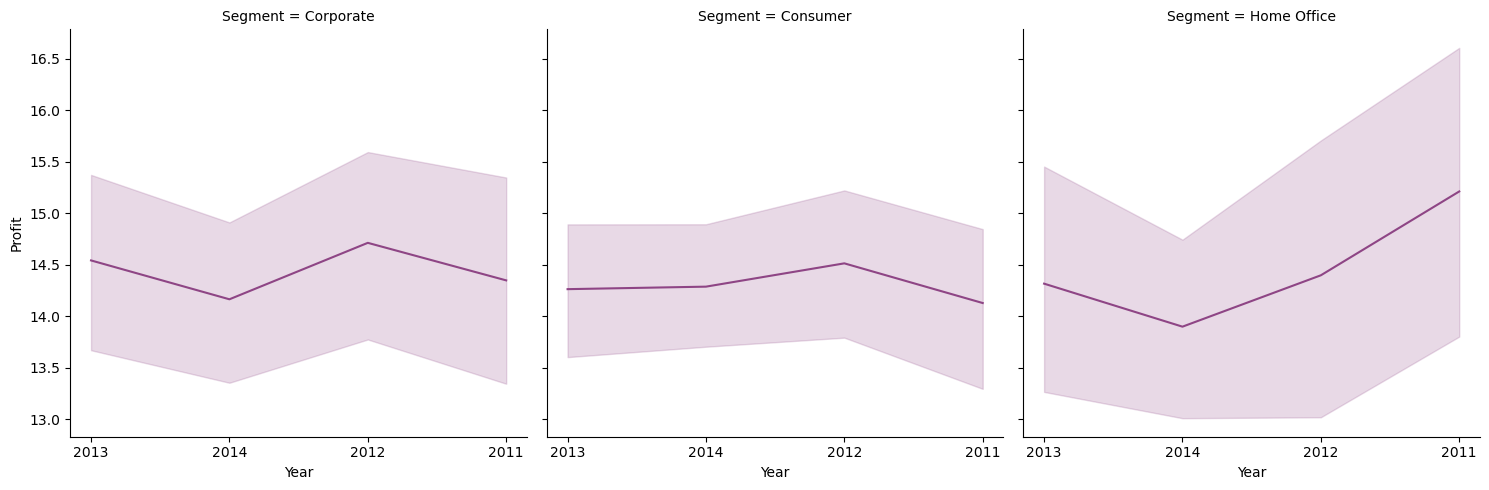

In [47]:
sns.relplot(x=walmartdf['Year'],y=walmartdf['Profit'],col=walmartdf['Segment'],kind='line',color='#8E4585')
plt.show()

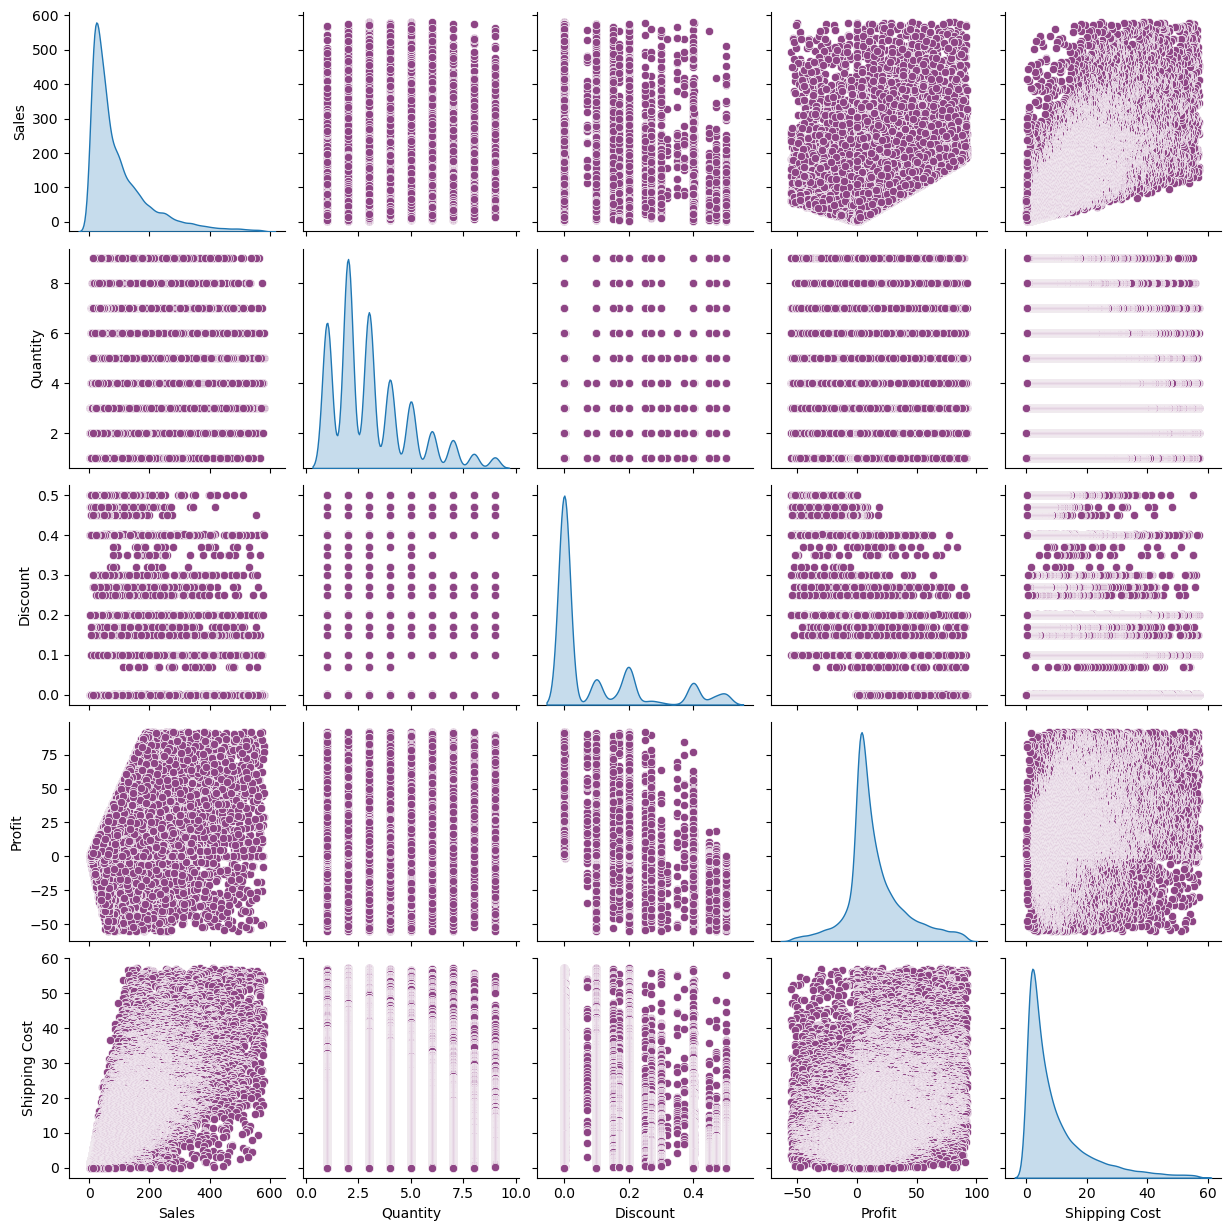

In [48]:
sns.pairplot(walmartdf[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']], diag_kind='kde', plot_kws={'color':'#8E4585'})
plt.show()

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_2715/3151414406.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(walmartdf.corr(),cmap='viridis',annot=True)


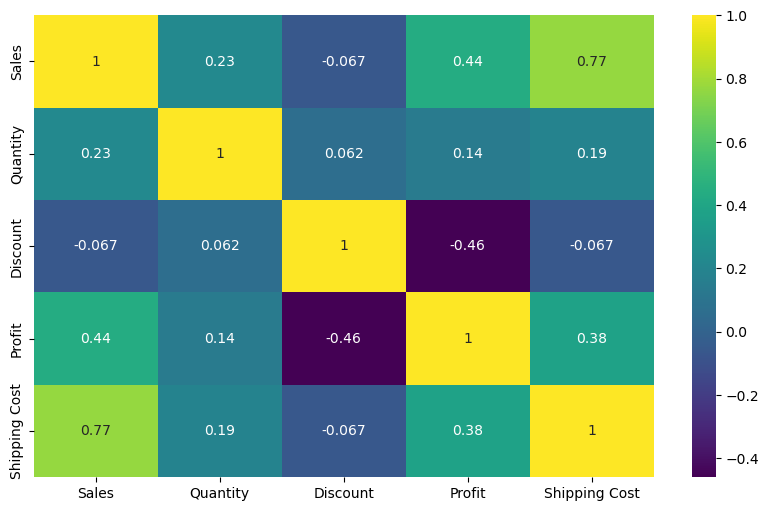

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(walmartdf.corr(),cmap='viridis',annot=True)
plt.show()

**Note:**
Dropping columns before encoding categorical variables is crucial to avoid generating numerous dummy columns that may not contribute meaningfully to the predictive model. This step ensures that only relevant features are considered, reducing complexity and potential noise in the model.

In [50]:
# Define columns to drop
columns_to_drop = ['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Market', 'Region', 
                   'Order Date', 'Ship Date','Year','Month','City','State','Country','Ship Mode','Product Name','Order Priority',]

# Drop the specified columns
cleaneddf=walmartdf.drop(columns=columns_to_drop, axis=1, inplace=True)


In [90]:
walmartdf

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
5909,Corporate,Technology,Phones,369.576,3,0.2,41.5773,57.200
5914,Corporate,Furniture,Furnishings,158.760,7,0.1,21.0000,57.120
5915,Consumer,Furniture,Tables,411.800,2,0.0,70.0060,57.120
5921,Consumer,Technology,Accessories,254.160,1,0.0,40.6500,57.070
5922,Corporate,Furniture,Bookcases,449.496,6,0.4,-30.0240,57.050
...,...,...,...,...,...,...,...,...
51284,Home Office,Office Supplies,Binders,58.050,5,0.1,19.9500,0.010
51285,Corporate,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.010
51287,Home Office,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.010
51288,Home Office,Office Supplies,Binders,13.440,2,0.0,2.4000,0.003


In [51]:
cleaneddf.shape

(36311, 8)

### Encoding Categorical Variables

In [52]:
#creating a seperate df with object columns
cleaneddf_objs=walmartdf.select_dtypes(include='object')

In [53]:
#creating dummies for that object columns
cleaneddf_objs= pd.get_dummies(walmartdf_objs,drop_first=True)

In [54]:
#Dummy variables Data frame
cleaneddf_objs

,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
5909,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5921,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5922,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
51285,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
51287,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
51288,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
#now dropping the original categorical columns from original df 
Superviseddf=cleaneddf.drop(['Segment','Category','Sub-Category'],axis=1)

In [56]:
#original dataframe
Superviseddf

,Sales,Quantity,Discount,Profit,Shipping Cost
5909,369.576,3,0.2,41.5773,57.200
5914,158.760,7,0.1,21.0000,57.120
5915,411.800,2,0.0,70.0060,57.120
5921,254.160,1,0.0,40.6500,57.070
5922,449.496,6,0.4,-30.0240,57.050
...,...,...,...,...,...
51284,58.050,5,0.1,19.9500,0.010
51285,65.100,5,0.0,4.5000,0.010
51287,22.920,3,0.0,11.2308,0.010
51288,13.440,2,0.0,2.4000,0.003


In [57]:
#adding created dummies to original df
Superviseddf=pd.concat([Superviseddf,walmartdf_objs],axis=1)

In [58]:
Superviseddf.shape

(36311, 25)

In [59]:
#checking whether we have any categorical columns
Superviseddf.select_dtypes(include=['object']).columns

Index([], dtype='object')

### Feature selection

The goal of feature selection is to improve the performance, interpretability, and efficiency of the machine learning model by identifying and retaining the most relevant features while discarding redundant or irrelevant ones.

Initially, the plan was to predict the quantity of products needed using historical data, focusing on features such as segment, category, sub-category, and product names. However, due to the high dimensionality caused by encoding numerous product names, the approach is being reconsidered.

#### Revised Approach:
1. **Target Variable Selection**:
   - **Original Plan**: Initially considered using `Sales` as the target variable to predict product demand.
   - **Revised Plan**: Considering using `Quantity` as the target variable for forecasting Volume. This shift allows for more manageable data dimensions and meaningful insights into Quantity trends across segments, categories, and sub-categories.
   

2. **Feature Selection**:
   - **Original Plan**: Planned to include features like segment, category, sub-category, and product names.
   - **Revised Plan**: Considering retaining features such as segment, category, and sub-category while dropping the product name column. This approach reduces dimensionality while retaining essential categorical information for sales prediction.

By focusing on Quantity prediction and strategic inventory management, this revised approach aims to develop a more effective predictive model that aligns with business objectives and operational requirements.

Choosing the **Quantity** column as the target variable is crucial for inventory management. Sales directly reflects product demand, guiding decisions on inventory levels and stock optimization. By forecasting Sales accurately using historical data, businesses can anticipate demand trends, adjust procurement strategies, and ensure optimal inventory levels to meet customer needs efficiently.

In [60]:
#finding which columns are more correlated to Target column
Superviseddf.corr()['Quantity'].sort_values()

Category_Technology        -0.088689
Sub-Category_Copiers       -0.083829
Sub-Category_Bookcases     -0.074138
Sub-Category_Machines      -0.059351
Sub-Category_Phones        -0.047423
Sub-Category_Chairs        -0.042294
Sub-Category_Storage       -0.035109
Sub-Category_Tables        -0.034618
Sub-Category_Appliances    -0.018432
Segment_Home Office        -0.002289
Segment_Corporate           0.001666
Sub-Category_Furnishings    0.009704
Sub-Category_Art            0.014294
Sub-Category_Supplies       0.021685
Sub-Category_Envelopes      0.024341
Sub-Category_Binders        0.032540
Sub-Category_Fasteners      0.041326
Sub-Category_Paper          0.051951
Sub-Category_Labels         0.053168
Discount                    0.062424
Category_Office Supplies    0.112734
Profit                      0.138465
Shipping Cost               0.192825
Sales                       0.229617
Quantity                    1.000000
Name: Quantity, dtype: float64

In [61]:
Superviseddf=Superviseddf.drop(['Shipping Cost','Discount'],axis=1)

In [62]:
Superviseddf

,Sales,Quantity,Profit,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
5909,369.576,3,41.5773,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5914,158.760,7,21.0000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5915,411.800,2,70.0060,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5921,254.160,1,40.6500,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5922,449.496,6,-30.0240,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,58.050,5,19.9500,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51285,65.100,5,4.5000,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
51287,22.920,3,11.2308,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51288,13.440,2,2.4000,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [63]:
#Dividing the data into Features and Labels
X=Superviseddf.drop(['Quantity'],axis=1)
y=Superviseddf['Quantity']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [65]:
print("X_train size :",X_train.shape)
print("y_train size :",y_train.shape)
print("X_test size :",X_test.shape)
print("y_test size :",y_test.shape)

X_train size : (32679, 22)
y_train size : (32679,)
X_test size : (3632, 22)
y_test size : (3632,)


In [66]:
scaler=StandardScaler()
scaler=scaler.fit(X_train)
scaledX_train=scaler.transform(X_train)
scaledX_test=scaler.transform(X_test)

# Linear Regression Model (Estimator)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression()

In [69]:
model.fit(X_train,y_train)

LinearRegression()

In [70]:
test_predictions=model.predict(X_test)
test_predictions

array([1.67493513, 2.50119538, 2.05776379, ..., 2.71752798, 3.54180842,
       3.2058473 ])

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [72]:
#Mean Absolute error
MAE = mean_absolute_error(y_test,test_predictions)
MAE

1.314117411884212

In [73]:
#Mean Squared error
MSE = mean_squared_error(y_test,test_predictions)
MSE


2.8588199687411735

In [74]:
#Root Mean Square error
RMSE = np.sqrt(MSE)
RMSE

1.6908045329786567

## Random Forest

Random Forest is an ensemble learning technique used for both classification and regression tasks. It is a versatile and powerful machine learning algorithm that builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [76]:
#Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [77]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
# Predict using the trained model
rf_predictions = rf_model.predict(X_test)

In [79]:
print(rf_predictions)

[1.02 2.42 2.14 ... 1.62 5.07 3.56]


In [80]:
#Mean Squared error
rf_MAE = mean_absolute_error(y_test,rf_predictions)
rf_MAE

0.8650435428267889

In [81]:
#Mean Squared error
rf_MSE = mean_squared_error(y_test,rf_predictions)
rf_MSE

1.7543288798155265

In [82]:
#Mean Squared error
rf_RMSE =np.sqrt(rf_MSE)
rf_RMSE

1.324510807738286

## Actual vs Predicted 

In [83]:
# Actual vs Predicted Plots for Random Forest Model
# Create a DataFrame for actual and predicted quantities
predict_quantity_df = pd.DataFrame({'Actual': y_test, 'Predicted_RF': rf_predictions})

# Group by Sub-Category and calculate the sum of quantities for actual and predicted values
predict_quantity_df = predict_quantity_df.groupby(walmartdf['Sub-Category']).sum().reset_index()

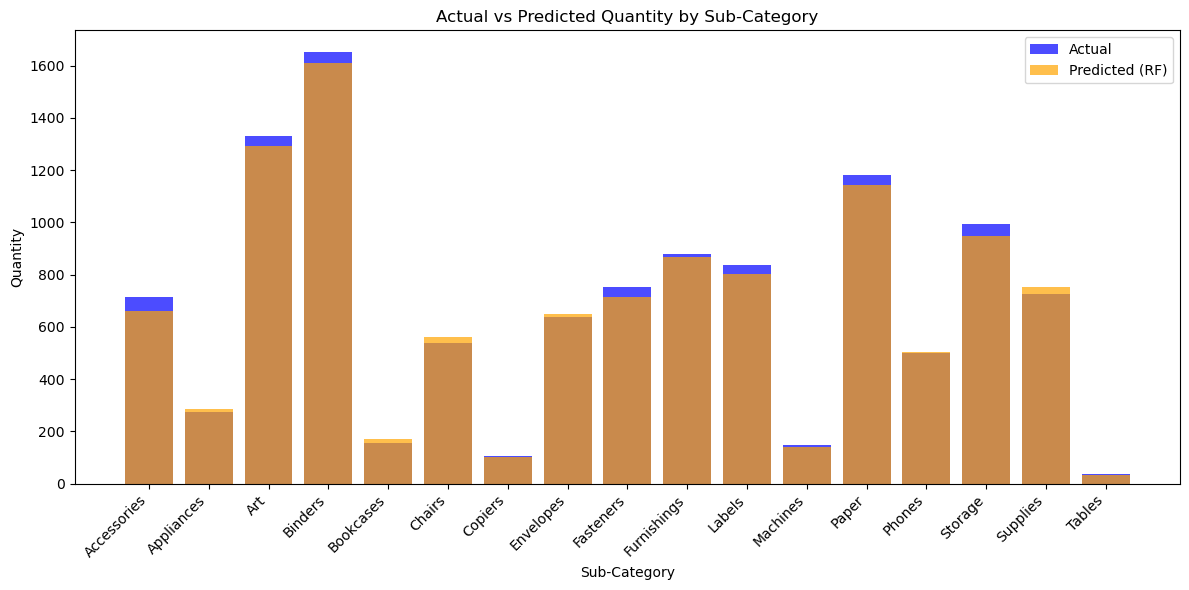

In [84]:
# Plotting actual vs predicted quantities
plt.figure(figsize=(12, 6))
plt.bar(predict_quantity_df['Sub-Category'], predict_quantity_df['Actual'], color='blue', alpha=0.7, label='Actual')
plt.bar(predict_quantity_df['Sub-Category'], predict_quantity_df['Predicted_RF'], color='orange', alpha=0.7, label='Predicted (RF)')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Quantity by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [85]:
# Create a DataFrame for actual and predicted quantities by sub-category
sub_category_comparison_df = pd.DataFrame({
    'Sub-Category': predict_quantity_df['Sub-Category'],
    'Actual_Quantity': predict_quantity_df['Actual'],
    'Predicted_Quantity_RF': predict_quantity_df['Predicted_RF']
})

In [86]:
# Pivot the DataFrame to show actual and predicted quantities for each sub-category
pivot_table_df = sub_category_comparison_df.pivot_table(index='Sub-Category',
                                                       values=['Actual_Quantity', 'Predicted_Quantity_RF'],
                                                       aggfunc='sum')

In [87]:
# Pivot the DataFrame to show actual and predicted quantities for each sub-category
pivot_table_df

,Actual_Quantity,Predicted_Quantity_RF
Sub-Category,,
Accessories,715,660.660000
Appliances,272,283.561000
Art,1332,1292.029226
Binders,1652,1609.943402
Bookcases,157,171.360000
Chairs,538,561.900000
Copiers,106,102.020000
Envelopes,639,648.899667
Fasteners,754,715.430857


**Recommendations for inventory management**:

Increase inventory for Bookcases, Copiers, and Machines to avoid stock shortages.
Review and potentially reduce inventory levels for Appliances, Art, and Fasteners.
Implement dynamic monitoring and automated replenishment systems.
Adjust inventory based on seasonal demand variations.
Collaborate closely with suppliers for faster restocking and reduce lead times.
Monitor customer feedback and market trends to align inventory with demand patterns.
By following these recommendations, businesses can optimize inventory levels, reduce carrying costs, and improve overall supply chain efficiency to meet customer demand effectively.